<a href="https://colab.research.google.com/github/AmeerTechsoft/Data-science-project/blob/main/Copy_of_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import glob
import random
from os import listdir
import tensorflow as tf
import keras.utils as image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from skimage.feature import greycomatrix, greycoprops

In [ ]:
breast_dataset = glob.glob('/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive = True)

for imgname in breast_dataset[:5]:
    print(imgname)

/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10300/0/10300_idx5_x3151_y1351_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10300/0/10300_idx5_x1151_y1801_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10300/0/10300_idx5_x1901_y1901_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10300/0/10300_idx5_x2801_y801_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10300/0/10300_idx5_x2351_y1051_class0.png


In [ ]:
# Count the number of images in the dataset
num_images = len(breast_dataset)
print(f"Number of images: {num_images}")

Number of images: 277524


In [ ]:
# Get the dimensions of the first image
first_image = cv2.imread(breast_dataset[0])
height, width, channels = first_image.shape
print(f"Image dimensions: {height}x{width}x{channels}")

Image dimensions: 50x50x3


In [ ]:
# Calculate the number of classes
classes = set()
for imgname in breast_dataset:
    class_name = imgname.split('/')[-2]
    classes.add(class_name)
num_classes = len(classes)
print(f"Number of classes: {num_classes}")

Number of classes: 2


In [ ]:
# Get the distribution of classes
class_counts = {}
for imgname in breast_dataset:
    class_name = imgname.split('/')[-2]
    if class_name not in class_counts:
        class_counts[class_name] = 0
    class_counts[class_name] += 1
print(f"Class distribution: {class_counts}")

Class distribution: {'1': 78786, '0': 198738}


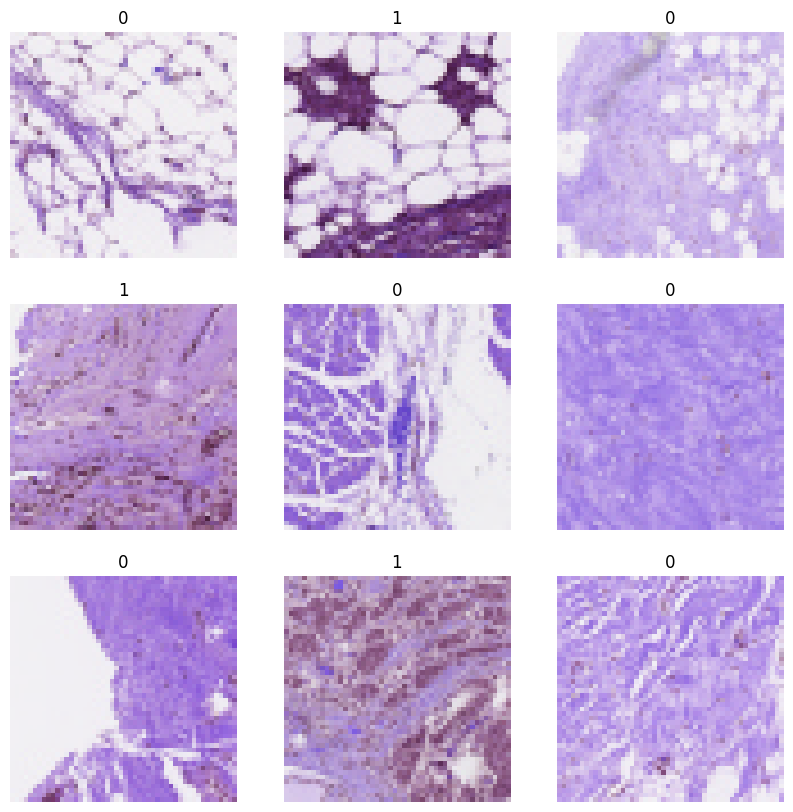

In [ ]:
# Visualize some random images
plt.figure(figsize=(10, 10))
for i in range(9):
    random_index = random.randint(0, len(breast_dataset) - 1)
    imgname = breast_dataset[random_index]
    image = cv2.imread(imgname)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(imgname.split('/')[-2])
    plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/

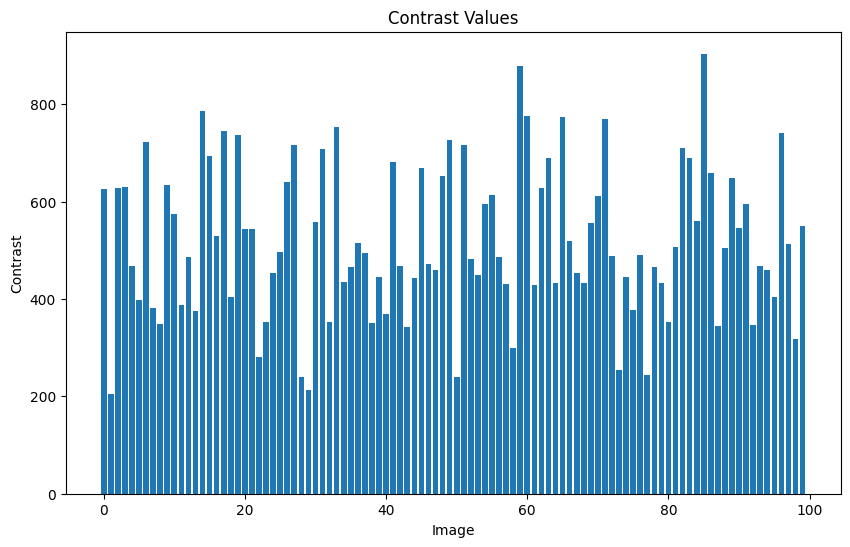

In [ ]:
# Calculate the co-occurrence matrix for each image
cooccurrence_matrices = []
for imgname in breast_dataset[:100]:
    image = cv2.imread(imgname, 0)
    cooccurrence_matrix = greycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
    cooccurrence_matrices.append(cooccurrence_matrix)

# Calculate the texture features for each image
contrast = []
for cooccurrence_matrix in cooccurrence_matrices:
    contrast.append(greycoprops(cooccurrence_matrix, 'contrast')[0][0])

# Create a bar chart of the contrast values
plt.figure(figsize=(10, 6))
plt.bar(range(len(contrast)), contrast)
plt.title('Contrast Values')
plt.xlabel('Image')
plt.ylabel('Contrast')
plt.show()

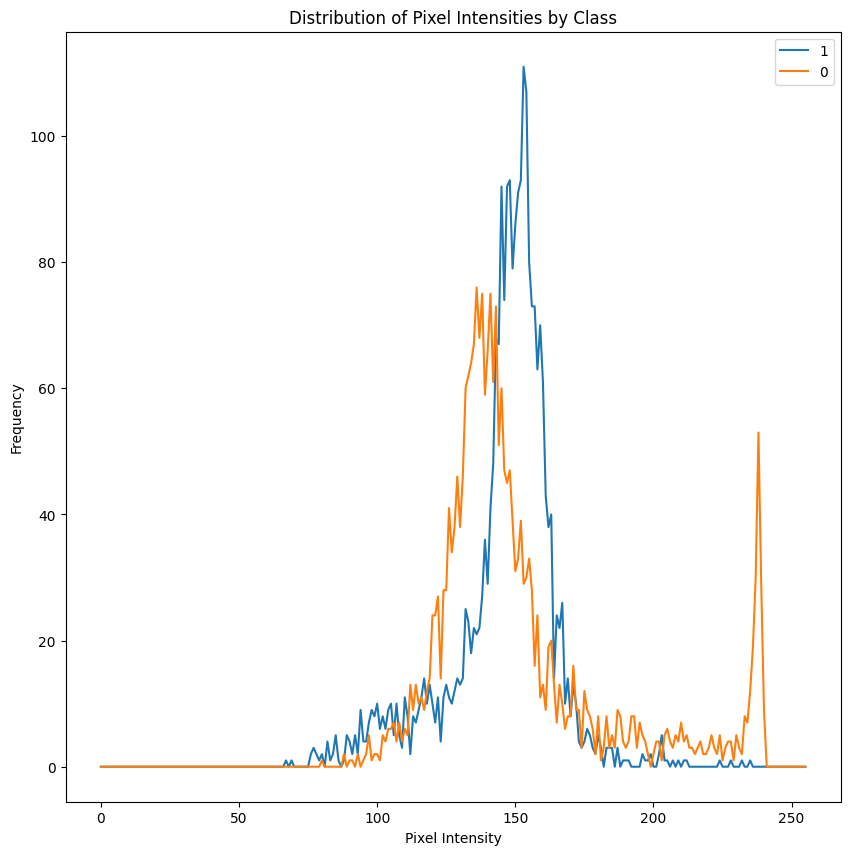

In [ ]:
# Load the images
images = []
labels = []
for imgname in breast_dataset:
    image = cv2.imread(imgname)
    images.append(image)
    labels.append(imgname.split('/')[-2])

# Convert the images to grayscale
gray_images = []
for image in images:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_images.append(gray_image)

# Calculate the histograms
histograms = {}
for i, gray_image in enumerate(gray_images):
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    histograms[labels[i]] = histogram

# Plot the histograms
plt.figure(figsize=(10, 10))
for class_name, histogram in histograms.items():
    plt.plot(histogram, label=class_name)
plt.legend()
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Distribution of Pixel Intensities by Class")
plt.show()


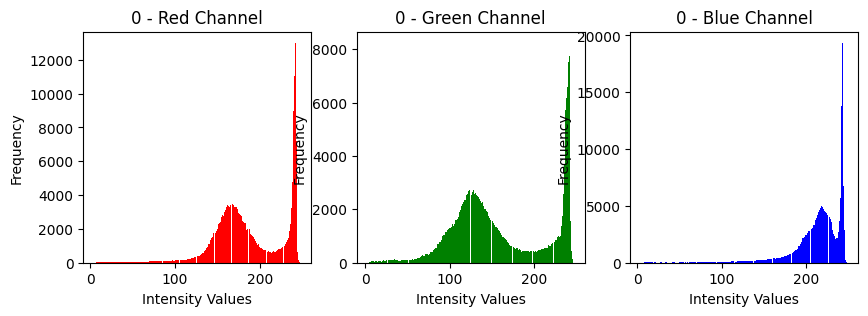

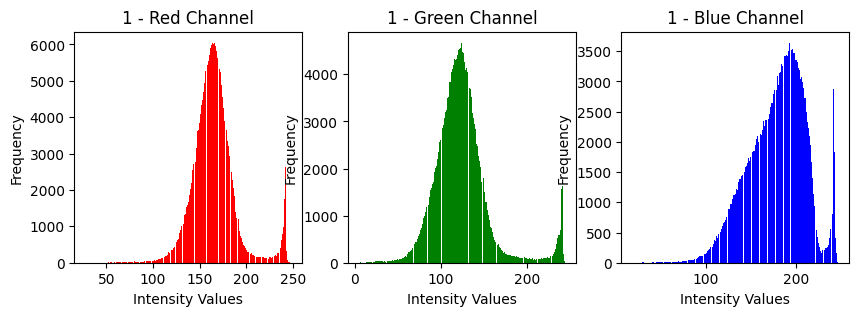

In [ ]:
def plot_histograms(breast_dataset):
    for class_name in classes:
        class_images = [imgname for imgname in breast_dataset if imgname.split('/')[-2] == class_name]
        class_images = class_images[:100] # Take only first 100 images of each class
        red_channels = []
        green_channels = []
        blue_channels = []
        for imgname in class_images:
            image = cv2.imread(imgname)
            red_channels.extend(image[:, :, 0].flatten())
            green_channels.extend(image[:, :, 1].flatten())
            blue_channels.extend(image[:, :, 2].flatten())
        plt.figure(figsize=(10, 3))
        plt.subplot(1, 3, 1)
        plt.hist(red_channels, bins=256, color='red')
        plt.title(f"{class_name} - Red Channel")
        plt.xlabel("Intensity Values")
        plt.ylabel("Frequency")
        plt.subplot(1, 3, 2)
        plt.hist(green_channels, bins=256, color='green')
        plt.title(f"{class_name} - Green Channel")
        plt.xlabel("Intensity Values")
        plt.ylabel("Frequency")
        plt.subplot(1, 3, 3)
        plt.hist(blue_channels, bins=256, color='blue')
        plt.title(f"{class_name} - Blue Channel")
        plt.xlabel("Intensity Values")
        plt.ylabel("Frequency")
        plt.show()

plot_histograms(breast_dataset)


In [ ]:
# Morphological Analysis
def extract_morphological_features(image):
  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Threshold the image to segment the nuclei
  thresh, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
  # Find the contours of the nuclei
  contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  # Calculate the shape and size features of the nuclei
  features = []
  for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    circularity = 4 * np.pi * area / (perimeter * perimeter)
    features.append([area, perimeter, circularity])
  return features




In [ ]:
# Texture Analysis
def extract_texture_features(image):
  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Calculate the LBP features
  lbp = local_binary_patterns(gray_image, 8, 1)
  lbp_hist, _ = np.histogram(lbp.ravel(), bins=256, range=(0, 256))
  # Calculate the GLCM features
  glcm = graycomatrix(gray_image, [1], [0], levels=256)
  glcm_features = haralick(glcm)
  # Combine the LBP and GLCM features
  features = np.concatenate((lbp_hist, glcm_features.ravel()))
  return features

In [ ]:
# Calculate the mean and standard deviation of the image dimensions
heights = []
widths = []
for imgname in breast_dataset:
    image = cv2.imread(imgname)
    height, width, channels = image.shape
    heights.append(height)
    widths.append(width)
mean_height = np.mean(heights)
mean_width = np.mean(widths)
std_height = np.std(heights)
std_width = np.std(widths)
print(f"Mean height: {mean_height:.2f}")
print(f"Standard deviation of height: {std_height:.2f}")
print(f"Mean width: {mean_width:.2f}")
print(f"Standard deviation of width: {std_width:.2f}")

Mean height: 49.82
Standard deviation of height: 2.39
Mean width: 49.99
Standard deviation of width: 0.55


In [ ]:
# Calculate the distribution of channels
channels_count = {}
for imgname in breast_dataset:
    image = cv2.imread(imgname)
    channels = image.shape[2]
    if channels not in channels_count:
        channels_count[channels] = 0
    channels_count[channels] += 1
print(f"Distribution of channels: {channels_count}")

Distribution of channels: {3: 277524}


In [ ]:
Negative_IDC = []
Positive_IDC = []

for img in breast_dataset:
    if img[-5] == '0' :
        Negative_IDC.append(img)

    elif img[-5] == '1' :
        Positive_IDC.append(img)

In [ ]:
print(f"Negative IDC= {len(Negative_IDC)}")
print(f"Positive IDC{len(Positive_IDC)}")

198738
78786


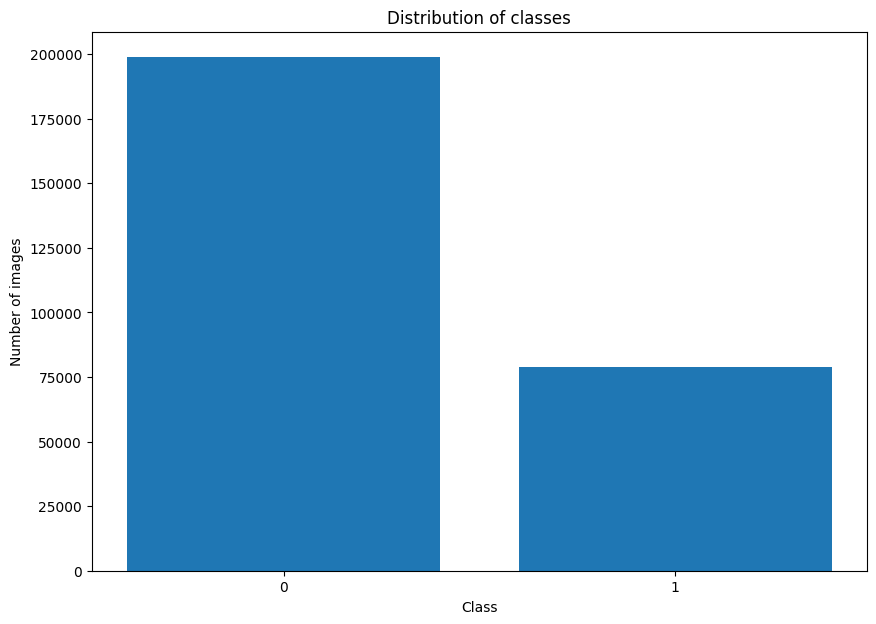

In [ ]:
# Visualize the distribution of classes
plt.figure(figsize=(10, 7))
class_names = list(classes)
class_counts = [class_counts[class_name] for class_name in class_names]
plt.bar(class_names, class_counts)
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.title("Distribution of classes")
plt.show()

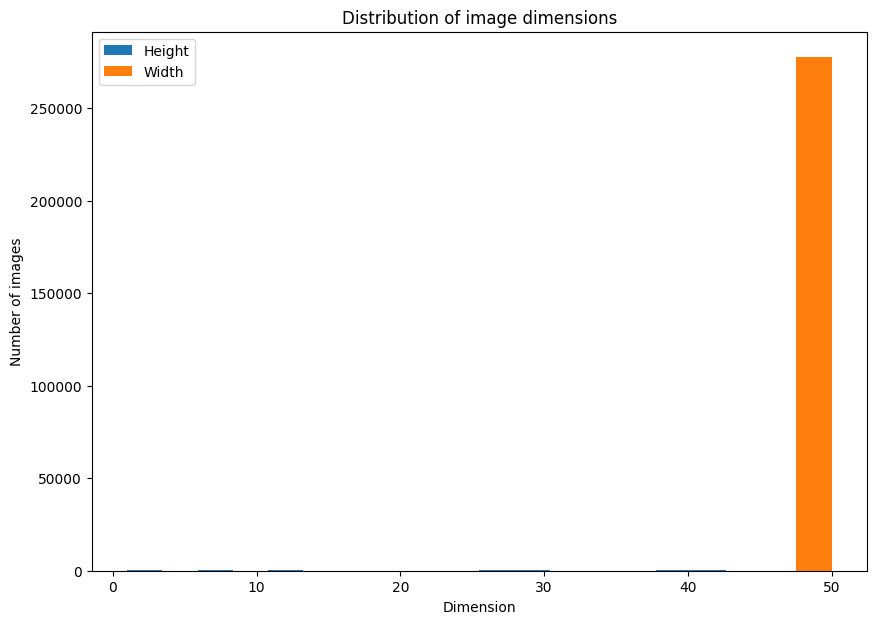

In [ ]:
# Visualize the distribution of image dimensions
plt.figure(figsize=(10, 7))
plt.hist(heights, bins=20, label="Height")
plt.hist(widths, bins=20, label="Width")
plt.xlabel("Dimension")
plt.ylabel("Number of images")
plt.title("Distribution of image dimensions")
plt.legend()
plt.show()

In [ ]:
def process_images(image_paths, label):
    processed_images = []
    for img in image_paths:
        image = cv2.imread(img, cv2.IMREAD_COLOR)
        resized_image = cv2.resize(image, (50, 50), interpolation=cv2.INTER_LINEAR)
        processed_images.append([resized_image, label])
    return processed_images

non_cancer_images = process_images(Negative_IDC, 0)
cancer_images = process_images(Positive_IDC, 1)


In [ ]:
X = []
y = []

breast_img_arr = non_cancer_images[:4000] + cancer_images[:4000]
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)


In [ ]:
# prompt: what is the process above called is it over sampling or undersampling?

# The process above is called **undersampling**.

# Explanation:
# You are taking 4000 samples each from both the majority class (Negative_IDC) and the minority class (Positive_IDC).
# This reduces the number of samples from the majority class to match the number of samples in the minority class,
# hence balancing the dataset.

# In oversampling, you would increase the number of samples in the minority class to match the majority class.


In [ ]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X, y)

Total number of images: 8000
Number of IDC(-) Images: 4000
Number of IDC(+) Images: 4000
Image shape (Width, Height, Channels): (50, 50, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Y_train_cnn = to_categorical(y_train, num_classes = 2)
Y_test_cnn = to_categorical(y_test, num_classes = 2)

X_train_cnn = X_train
X_test_cnn = X_test

print("Training Data Shape:", X_train_cnn.shape)
print("Testing Data Shape:", X_test_cnn.shape)

Training Data Shape: (6400, 50, 50, 3)
Testing Data Shape: (1600, 50, 50, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', min_delta = 0.00001, patience=10)

model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model.add(BatchNormalization())

# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

# Fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Fifth convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Flatten layer
model.add(Flatten())

# First dense layer
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

# Second dense layer
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())

# Third dense layer
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

# Fourth dense layer
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))

# Output layer
model.add(Dense(2, activation='softmax'))

model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 50, 50, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 25, 25, 32)        128       
 chNormalization)                                                
                                                        

In [ ]:
history = model.fit(X_train_cnn, Y_train_cnn, epochs=50, validation_split=0.2, callbacks=[early_stop])

Epoch 1/50
160/160 [==============================] - 13s 67ms/step - loss: 0.5361 - accuracy: 0.7760 - val_loss: 1.4986 - val_accuracy: 0.5094
Epoch 2/50
160/160 [==============================] - 10s 62ms/step - loss: 0.4273 - accuracy: 0.8240 - val_loss: 0.4509 - val_accuracy: 0.8164
Epoch 3/50
160/160 [==============================] - 10s 60ms/step - loss: 0.3867 - accuracy: 0.8365 - val_loss: 0.4096 - val_accuracy: 0.8289
Epoch 4/50
160/160 [==============================] - 10s 62ms/step - loss: 0.3683 - accuracy: 0.8439 - val_loss: 0.4601 - val_accuracy: 0.7875
Epoch 5/50
160/160 [==============================] - 10s 61ms/step - loss: 0.3451 - accuracy: 0.8557 - val_loss: 0.4229 - val_accuracy: 0.8070
Epoch 6/50
160/160 [==============================] - 10s 60ms/step - loss: 0.3279 - accuracy: 0.8631 - val_loss: 0.3793 - val_accuracy: 0.8406
Epoch 7/50
160/160 [==============================] - 10s 61ms/step - loss: 0.3057 - accuracy: 0.8717 - val_loss: 0.5202 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report

y_pred_cnn = model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

print(f"CNN Classification Report")
print(classification_report(y_test, y_pred_cnn))


50/50 [==============================] - 1s 15ms/step
CNN Classification Report
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       808
           1       0.77      0.93      0.84       792

    accuracy                           0.82      1600
   macro avg       0.84      0.83      0.82      1600
weighted avg       0.84      0.82      0.82      1600



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, auc,roc_curve, RocCurveDisplay

# Calculate the AUC-ROC score
# Use model.predict directly instead of y_pred
aucroc = roc_auc_score(y_test, y_pred_cnn)
print(f'CNN AUC-ROC Score: {aucroc}')

CNN AUC-ROC Score: 0.826070107010701


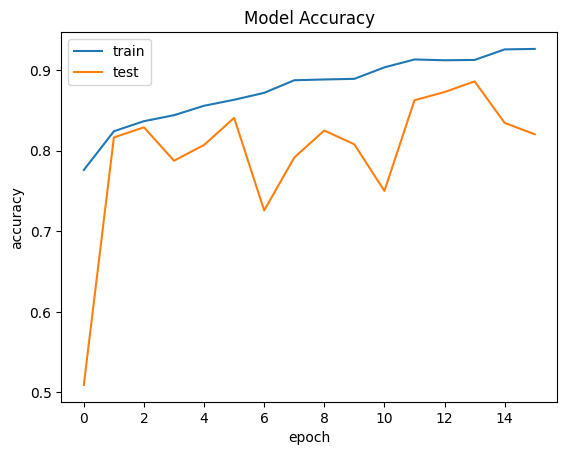

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

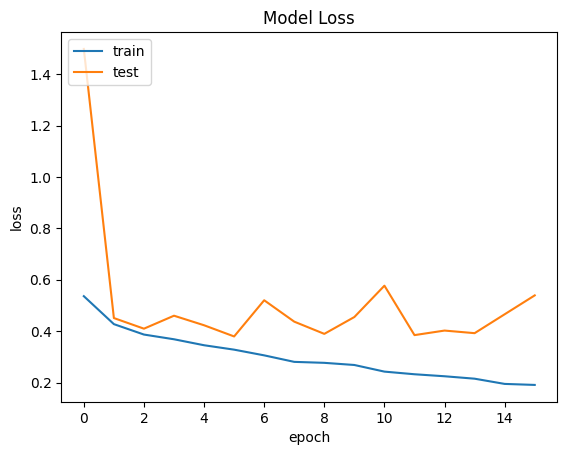

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Reshape the data to be 2D
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

In [ ]:
from sklearn import svm

svm_model = svm.SVC(C=1.0, kernel='rbf')
svm_model.fit(X_train_2d, y_train)

y_pred_svm = svm_model.predict(X_test_2d)

print(f"SVM Classification Report")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       808
           1       0.84      0.82      0.83       792

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.83      0.83      0.83      1600



In [ ]:
# Building a Decision Tree model
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=5,
                                  min_samples_split=10,
                                  min_samples_leaf=5)

decision_tree.fit(X_train_2d, y_train)

y_pred_dt = decision_tree.predict(X_test_2d)


print(f"Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       808
           1       0.74      0.88      0.80       792

    accuracy                           0.79      1600
   macro avg       0.80      0.79      0.78      1600
weighted avg       0.80      0.79      0.78      1600



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2d, y_train)

y_pred_knn = knn.predict(X_test_2d)


print(f"KNN Classification Report")
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64       808
           1       0.63      0.55      0.58       792

    accuracy                           0.61      1600
   macro avg       0.62      0.61      0.61      1600
weighted avg       0.62      0.61      0.61      1600



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(n_estimators=50,
                                  learning_rate=0.1,
                                  max_depth=5,
                                  min_samples_split=10,
                                  min_samples_leaf=5)
gradient_boosting.fit(X_train_2d, y_train)
y_pred_gb = gradient_boosting.predict(X_test_2d)


print(f"Gradient boosting Classification Report")
print(classification_report(y_test, y_pred_gb))

Gradient boosting Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       808
           1       0.82      0.85      0.84       792

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



In [ ]:
# Calculate the AUC-ROC score for each model
aucroc_cnn = roc_auc_score(y_test, y_pred_cnn)
aucroc_svm = roc_auc_score(y_test, y_pred_svm)
aucroc_dt = roc_auc_score(y_test, y_pred_dt)
aucroc_knn = roc_auc_score(y_test, y_pred_knn)
aucroc_gb = roc_auc_score(y_test, y_pred_gb)

# Print the AUC-ROC scores
print(f'CNN AUC-ROC Score: {aucroc_cnn*100:.2f}%')
print(f'SVM AUC-ROC Score: {aucroc_svm*100:.2f}%')
print(f'Decision Tree AUC-ROC Score: {aucroc_dt*100:.2f}%')
print(f'KNN AUC-ROC Score: {aucroc_knn*100:.2f}%')
print(f'Gradient Boosting AUC-ROC Score: {aucroc_gb*100:.2f}%')


CNN AUC-ROC Score: 82.61%
SVM AUC-ROC Score: 83.24%
Decision Tree AUC-ROC Score: 78.71%
KNN AUC-ROC Score: 61.37%
Gradient Boosting AUC-ROC Score: 83.58%


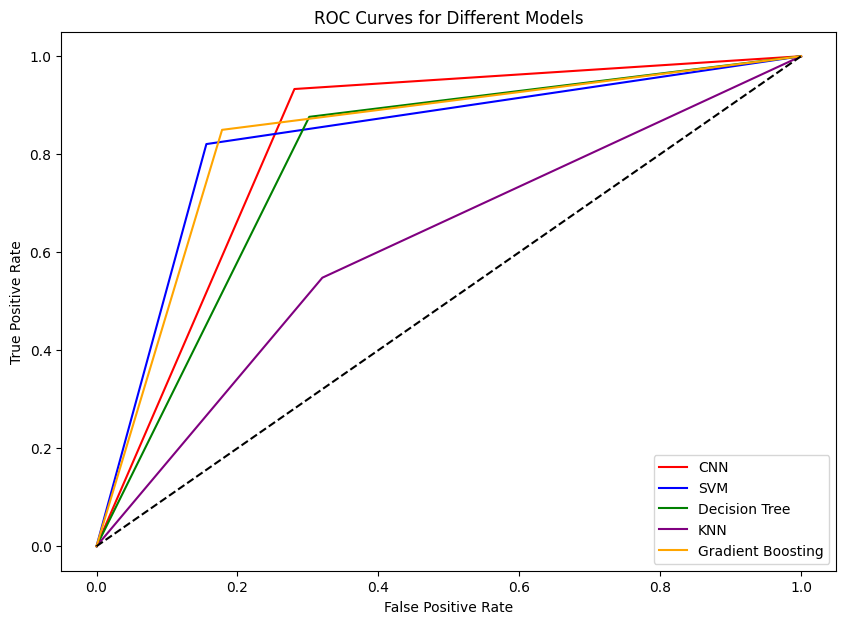

In [ ]:
# Calculate ROC curves for each model
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_cnn, tpr_cnn, label="CNN", color="red")
plt.plot(fpr_svm, tpr_svm, label="SVM", color="blue")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree", color="green")
plt.plot(fpr_knn, tpr_knn, label="KNN", color="purple")
plt.plot(fpr_gb, tpr_gb, label="Gradient Boosting", color="orange")

# Add diagonal line
plt.plot([0, 1], [0, 1], color="black", linestyle="--")

# Add labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:
import pickle

# Save the CNN model
with open('cnn_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Save the SVM model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [ ]:
# Save the Decision Tree model
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(decision_tree, f)

In [ ]:
# Save the KNN model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [ ]:
# Save the Gradient Boosting model
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gradient_boosting, f)